In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import os
import matplotlib.pyplot as plt



from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,LabelEncoder
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from xgboost import XGBRegressor,XGBRFRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import plot_importance
import warnings
warnings.filterwarnings("ignore")

In [33]:
data = pd.read_excel(os.getcwd() + "/data/ODMD_MainData.xlsx")
data = data.drop("Unnamed: 0",axis= 1)
data = data.sort_values(ascending=True,by="Date")
data.loc[data.MARKA == "KG MOBILITY – SSANGYONG",'MARKA'] = "SSANGYONG" 

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5654 entries, 4867 to 4080
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   MARKA       5654 non-null   object        
 1   YERLI_ADET  5654 non-null   int64         
 2   ITHAL_ADET  5654 non-null   int64         
 3   TOPLAM      5654 non-null   int64         
 4   HT_YERLI    5654 non-null   int64         
 5   HT_ITHAL    5654 non-null   int64         
 6   HT_TOPLAM   5654 non-null   int64         
 7   TTL_YERLI   5654 non-null   int64         
 8   TTL_ITHAL   5654 non-null   int64         
 9   TTL_TOPLAM  5654 non-null   int64         
 10  Date        5654 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(9), object(1)
memory usage: 530.1+ KB


In [35]:
## Total Sales by Brand
fig = px.line(
    data, x="Date", y="TTL_TOPLAM", color='MARKA',
    title= "Total Car Sales by Brand",
    labels={"Date":"Date","TTL_TOPLAM":"Total Sales"})
fig.update_layout(
    autosize=False,
    width = 1500,
    height = 500
)
fig.show()

In [36]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
YERLI_ADET,5654.0,386.189777,1454.040344,0.0,0.0,0.0,0.00,16624.0
ITHAL_ADET,5654.0,797.574107,1391.430539,0.0,5.0,114.0,1103.00,14539.0
TOPLAM,5654.0,1183.763884,2071.840507,0.0,5.0,136.0,1625.00,18707.0
HT_YERLI,5654.0,186.201804,946.222654,0.0,0.0,0.0,0.00,12111.0
HT_ITHAL,5654.0,164.010789,398.852470,0.0,0.0,0.0,127.75,4134.0
HT_TOPLAM,5654.0,350.212593,1073.817044,0.0,0.0,0.0,177.00,12795.0
TTL_YERLI,5654.0,572.391581,1985.852311,0.0,0.0,0.0,0.00,21198.0
TTL_ITHAL,5654.0,961.584896,1685.293838,0.0,12.0,171.0,1337.25,18082.0
TTL_TOPLAM,5654.0,1533.976477,2783.833099,0.0,18.0,204.5,1875.00,22093.0


In [37]:
## 0 olan satıs aylarını cıkar.
data = data[data.TTL_TOPLAM != 0]

In [38]:
## Total Sales by Date
total_sales = data[["Date","TOPLAM","HT_TOPLAM","TTL_TOPLAM"]].groupby("Date").agg(
    TotalSales = ("TTL_TOPLAM", np.sum),
    Total_Binek = ("TOPLAM",np.sum),
    Total_HT = ("HT_TOPLAM",np.sum),
    AvgSales = ("TTL_TOPLAM", np.mean),
    Avg_Binek = ("TOPLAM",np.mean),
    Avg_HT = ("HT_TOPLAM",np.mean),
    Count = ("Date",np.size)
    ).reset_index()

total_sales

,Date,TotalSales,Total_Binek,Total_HT,AvgSales,Avg_Binek,Avg_HT,Count
0,2014-01-01,32670,24368,8302,796.829268,594.341463,202.487805,41
1,2014-02-01,35021,27167,7854,795.931818,617.431818,178.500000,44
2,2014-03-01,47581,37812,9769,1081.386364,859.363636,222.022727,44
3,2014-04-01,53305,42769,10536,1300.121951,1043.146341,256.975610,41
4,2014-05-01,58121,46379,11742,1320.931818,1054.068182,266.863636,44
...,...,...,...,...,...,...,...,...
119,2023-12-01,158653,126416,32237,3305.270833,2633.666667,671.604167,48
120,2024-01-01,79701,64041,15660,1562.764706,1255.705882,307.058824,51
121,2024-02-01,105990,82277,23713,2078.235294,1613.274510,464.960784,51
122,2024-03-01,109828,87071,22757,2153.490196,1707.274510,446.215686,51


In [39]:
## Total Sales by Date
fig = px.line(
    total_sales, x="Date", y="TotalSales",
    title= "Total Car Sales by Date",
    labels={"Date":"Date","TotalSales":"Total Sales"})

fig.update_layout(
    autosize=False,
    width = 1500,
    height = 500
)
fig.show()

In [40]:
summary_table = data[["MARKA","TOPLAM","HT_TOPLAM","TTL_TOPLAM"]].groupby("MARKA").agg(
    TotalSales = ("TTL_TOPLAM", np.sum),
    Total_Binek = ("TOPLAM",np.sum),
    Total_HT = ("HT_TOPLAM",np.sum),
    AvgSales = ("TTL_TOPLAM", np.mean),
    Avg_Binek = ("TOPLAM",np.mean),
    Avg_HT = ("HT_TOPLAM",np.mean),
    Count = ("TOPLAM",np.size)
).reset_index()

summary_table

,MARKA,TotalSales,Total_Binek,Total_HT,AvgSales,Avg_Binek,Avg_HT,Count
0,ALFA ROMEO,6915,6915,0,56.680328,56.680328,0.000000,122
1,ALPINE,5,5,0,5.000000,5.000000,0.000000,1
2,ASTON MARTIN,196,196,0,2.085106,2.085106,0.000000,94
3,AUDI,179712,179712,0,1449.290323,1449.290323,0.000000,124
4,BENTLEY,171,171,0,2.060241,2.060241,0.000000,83
...,...,...,...,...,...,...,...,...
56,TESLA,12552,12552,0,1046.000000,1046.000000,0.000000,12
57,TOGG,26731,26731,0,2227.583333,2227.583333,0.000000,12
58,TOYOTA,465485,409576,55909,3753.911290,3303.032258,450.879032,124
59,VOLKSWAGEN,922489,716719,205770,7439.427419,5779.991935,1659.435484,124


In [41]:
fig = px.scatter(
    summary_table, 
    x="Total_Binek", y="Total_HT", color='MARKA',
    size="AvgSales")
fig.show()

In [42]:
## 24 ay ve altı satış yapan aracları inceleyelim.
brand_under_24 = data[data.MARKA.isin(summary_table[summary_table.Count < 50].MARKA)]


In [43]:
## Total Sales by Brand
fig = px.line(
    brand_under_24, x="Date", y="TTL_TOPLAM", color='MARKA',
    title= "Total Car Sales by Brand",
    labels={"Date":"Date","TTL_TOPLAM":"Total Sales"})
fig.update_layout(
    autosize=False,
    width = 1500,
    height = 500
)
fig.show()

In [44]:
###
# 50'den az gozlem bulunan markalar
### Bu markalar icin ayrı olarak daha basit modeller kurulacak.
brands_50 = summary_table[summary_table.Count < 50]["MARKA"].values
data = data[~data.MARKA.isin(brands_50)]


In [45]:
## son 1 yıldır satılmayan markalar
## Son 1 yıldır satılmayan markalara 0 tahmini yapılacak.
last_1_year_brand = data[data.Date >= '2022-04-01'].MARKA.unique()
all_brands = data.MARKA.unique()
non_sales_brand = [x for x in all_brands if x not in last_1_year_brand]
data = data[~data.MARKA.isin(non_sales_brand)]

In [46]:
## Total Sales by Brand
fig = px.line(
    brand_under_24, x="Date", y="TTL_TOPLAM", color='MARKA',
    title= "Total Car Sales by Brand",
    labels={"Date":"Date","TTL_TOPLAM":"Total Sales"})
fig.update_layout(
    autosize=False,
    width = 1500,
    height = 500
)
fig.show()

In [47]:
summary_table = data[["MARKA","TOPLAM","HT_TOPLAM","TTL_TOPLAM"]].groupby("MARKA").agg(
    TotalSales = ("TTL_TOPLAM", np.sum),
    Total_Binek = ("TOPLAM",np.sum),
    Total_HT = ("HT_TOPLAM",np.sum),
    AvgSales = ("TTL_TOPLAM", np.mean),
    Avg_Binek = ("TOPLAM",np.mean),
    Avg_HT = ("HT_TOPLAM",np.mean),
    Count = ("TOPLAM",np.size)
).reset_index()

summary_table

,MARKA,TotalSales,Total_Binek,Total_HT,AvgSales,Avg_Binek,Avg_HT,Count
0,ALFA ROMEO,6915,6915,0,56.680328,56.680328,0.000000,122
1,ASTON MARTIN,196,196,0,2.085106,2.085106,0.000000,94
2,AUDI,179712,179712,0,1449.290323,1449.290323,0.000000,124
3,BENTLEY,171,171,0,2.060241,2.060241,0.000000,83
4,BMW,203436,203436,0,1640.612903,1640.612903,0.000000,124
5,CITROEN,291546,206230,85316,2351.177419,1663.145161,688.032258,124
6,DACIA,381364,337077,44287,3075.516129,2718.362903,357.153226,124
7,DS,8855,8855,0,93.210526,93.210526,0.000000,95
8,FERRARI,191,191,0,1.969072,1.969072,0.000000,97
9,FIAT,1219104,717589,501515,9831.483871,5787.008065,4044.475806,124


In [48]:
## Total Sales by Brand
fig = px.line(
    data, x="Date", y="TTL_TOPLAM", color='MARKA',
    title= "Total Car Sales by Brand",
    labels={"Date":"Date","TTL_TOPLAM":"Total Sales"})
fig.update_layout(
    autosize=False,
    width = 1500,
    height = 500
)
fig.show()

In [49]:
ts_data = data[["Date","MARKA","TTL_TOPLAM"]]
## satis bulunmayan ayları 0 olarak oluşturalım.
combination = [(date, category) for date in ts_data.Date.unique() for category in ts_data.MARKA.unique()]
comb_data = pd.DataFrame(combination, columns=['Date', 'Brand'])

ts_data = comb_data.merge(ts_data,how="left",left_on=["Date","Brand"],right_on=["Date","MARKA"])[["Date","Brand","TTL_TOPLAM"]].fillna(0)

In [2]:
## get evds data
from evds_data import GetData

ob = GetData()

eco_data = ob.request_evds()
eco_data.tail()

TP.KTF11-TP.FG.J071-TP.FG.J0-TP.BRENTPETROL.EUBP-TP.KREDI.L013-TP.GY9.N2.MA-TP.YISGUCU2.G2-TP.YISGUCU2.G8-TP.HKFE01-TP.BEK.S01.A.S-TP.BEK.S01.D.S-TP.TG2.Y01-TP.TG2.Y08-TP.TG2.Y09-TP.TG2.Y17-TP.UR.S08-TP.UR.S11-TP.KKM.K2-TP.DK.EUR.A.YTL-TP.DK.USD.A.YTL


,Tarih,Tasit_Kredi_Faiz_Oran,Arac_Satin_Alim_Tufe,Genel_Enflasyon_Tufe,EU_Brent_Petrol_Spot,Ticari_Bireysel_Kredi,Guven_Endeksi,Isgucu,Issizlik_Oran,Konut_Fiyat_Endeksi,...,DTM_Uygunluk,DTM_Harcama_Dusuncesi,Otomobil_Alma_Ihtimali,Otomobil_Uretim_Binek,Otomobil_Uretim_Kamyonet,KKM_Paralari_USD_Karsiligi,Euro_TL,USD_TL,TUFE_Change,Arac_Satin_Alim_Tufe_Change
119,2023-12-01,35.3800,1768.20,1859.38,77.69,6.052672e+09,93.5,35259.0,8.9,1163.3,...,53.690000,94.460000,16.920000,76416.0,34093.0,59.2,31.657843,29.022562,2.927207,1.301067
120,2024-01-01,44.3900,1818.15,1984.02,82.98,6.115226e+09,90.4,34930.0,9.8,1190.1,...,48.963045,97.867152,15.982470,67059.0,33507.0,54.0,32.754268,29.999700,6.703310,2.824907
121,2024-02-01,43.2275,1832.17,2073.88,84.57,6.304965e+09,89.5,35513.0,9.2,1215.8,...,50.471665,97.525342,17.698508,83955.0,38689.0,52.2,33.137081,30.704152,4.529188,0.771113
122,2024-03-01,43.8980,1878.20,2139.47,86.17,6.624698e+09,91.1,35361.0,8.8,1230.5,...,55.657753,97.025251,19.204838,87260.0,40140.0,51.9,34.713729,31.929219,3.162671,2.512321
123,2024-04-01,38.0575,1903.23,2207.50,88.23,6.644192e+09,92.9,35244.0,8.5,NaN,...,47.108151,95.834394,17.830519,61835.0,28630.0,51.4,34.633211,32.271328,3.179759,1.332659


In [26]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

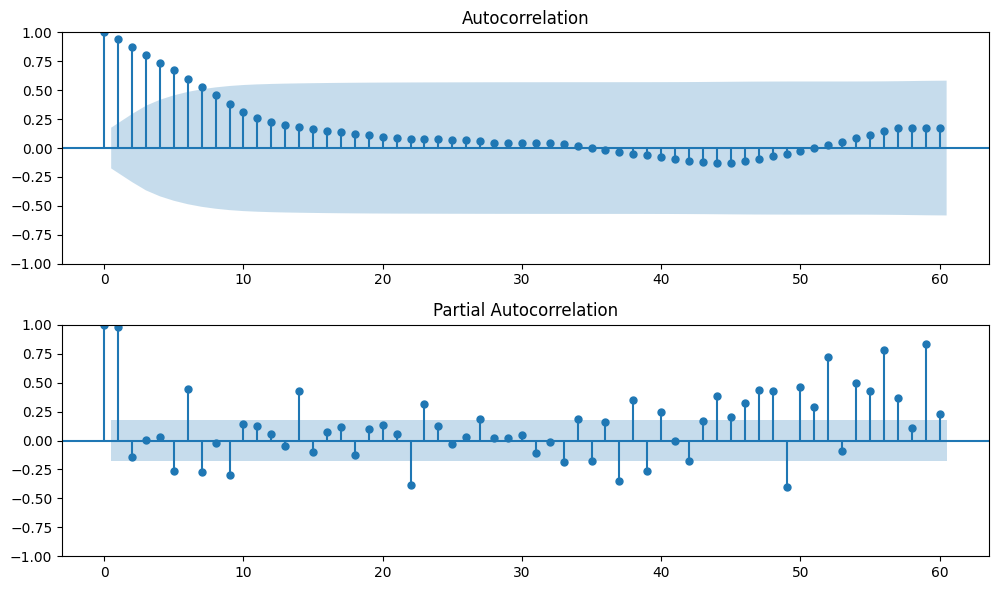

In [27]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,6))
plot_acf(eco_data["Tasit_Kredi_Faiz_Oran"],lags=60, ax=ax[0])
plot_pacf(eco_data["Tasit_Kredi_Faiz_Oran"],lags=60, ax=ax[1], method='ols')
plt.tight_layout()
plt.show()

In [31]:
eco_data[["Tarih","Genel_Enflasyon_Tufe"]]

,Tarih,Genel_Enflasyon_Tufe
0,2014-01-01,233.54
1,2014-02-01,234.54
2,2014-03-01,237.18
3,2014-04-01,240.37
4,2014-05-01,241.32
...,...,...
119,2023-12-01,1859.38
120,2024-01-01,1984.02
121,2024-02-01,2073.88
122,2024-03-01,2139.47


In [25]:
eco_data["Tasit_Kredi_Faiz_Oran_L1"] = eco_data["Tasit_Kredi_Faiz_Oran"].shift(1)
eco_data["Tasit_Kredi_Faiz_Oran_L2"] = eco_data["Tasit_Kredi_Faiz_Oran"].shift(2)
eco_data["Tasit_Kredi_Faiz_Oran_L3"] = eco_data["Tasit_Kredi_Faiz_Oran"].shift(3)


0          NaN
1      12.8400
2      15.0925
3      15.2100
4      14.9100
        ...   
119    43.9200
120    35.3800
121    44.3900
122    43.2275
123    43.8980
Name: Tasit_Kredi_Faiz_Oran, Length: 124, dtype: float64

In [21]:
ts_data_with_econ = ts_data.merge(eco_data,how="inner",left_on="Date",right_on="Tarih")
ts_data_with_econ = ts_data_with_econ.sort_values(ascending=True,by = "Date")

In [22]:
ts_data_with_econ.corr()

,TTL_TOPLAM,Tasit_Kredi_Faiz_Oran,Arac_Satin_Alim_Tufe,Genel_Enflasyon_Tufe,EU_Brent_Petrol_Spot,Ticari_Bireysel_Kredi,Guven_Endeksi,Isgucu,Issizlik_Oran,Konut_Fiyat_Endeksi,...,YilSonu_Tufe_Beklenti_SS,Tuketici_Guven_Endeksi,DTM_Uygunluk,DTM_Harcama_Dusuncesi,Otomobil_Alma_Ihtimali,Otomobil_Uretim_Binek,Otomobil_Uretim_Kamyonet,KKM_Paralari_USD_Karsiligi,TUFE_Change,Arac_Satin_Alim_Tufe_Change
TTL_TOPLAM,1.000000,0.003072,0.057538,0.058911,-0.027116,0.065356,0.065773,0.027178,-0.096554,0.075700,...,-0.000102,0.033823,0.050966,0.004942,0.068709,0.080064,0.104218,0.127740,-0.010025,-0.002844
Tasit_Kredi_Faiz_Oran,0.003072,1.000000,0.857178,0.844579,0.419297,0.825295,-0.269026,0.797655,-0.225807,0.816889,...,0.554261,-0.579979,-0.518764,-0.306456,0.358301,0.073832,-0.029483,0.683909,0.556932,0.153120
Arac_Satin_Alim_Tufe,0.057538,0.857178,1.000000,0.993453,0.429971,0.992005,-0.137416,0.806796,-0.364389,0.980580,...,0.654725,-0.591837,-0.500174,-0.457327,0.503810,0.012350,-0.043110,0.838637,0.598902,0.204037
Genel_Enflasyon_Tufe,0.058911,0.844579,0.993453,1.000000,0.408782,0.992001,-0.127744,0.789018,-0.370109,0.987608,...,0.626682,-0.553661,-0.459684,-0.413427,0.529966,0.020737,-0.038611,0.807022,0.547883,0.154696
EU_Brent_Petrol_Spot,-0.027116,0.419297,0.429971,0.408782,1.000000,0.382400,-0.141198,0.364835,-0.428951,0.392723,...,0.533412,-0.329695,-0.199092,-0.230281,0.206955,-0.163214,-0.093980,-0.645784,0.426447,0.109955
Ticari_Bireysel_Kredi,0.065356,0.825295,0.992005,0.992001,0.382400,1.000000,-0.107552,0.806287,-0.359760,0.984002,...,0.642623,-0.549334,-0.485487,-0.422566,0.548424,0.030811,-0.033629,0.912199,0.543439,0.180776
Guven_Endeksi,0.065773,-0.269026,-0.137416,-0.127744,-0.141198,-0.107552,1.000000,-0.099232,0.024301,-0.120563,...,-0.274339,0.334988,0.302844,0.348400,0.312122,0.221773,0.220521,0.827198,-0.318763,-0.285243
Isgucu,0.027178,0.797655,0.806796,0.789018,0.364835,0.806287,-0.099232,1.000000,-0.146683,0.748839,...,0.637521,-0.651772,-0.656298,-0.407171,0.333361,0.177301,0.071459,0.735570,0.533444,0.174972
Issizlik_Oran,-0.096554,-0.225807,-0.364389,-0.370109,-0.428951,-0.359760,0.024301,-0.146683,1.000000,-0.427109,...,-0.214587,-0.183480,-0.328584,-0.078384,-0.396149,0.025539,-0.178344,-0.781456,-0.179625,-0.048262
Konut_Fiyat_Endeksi,0.075700,0.816889,0.980580,0.987608,0.392723,0.984002,-0.120563,0.748839,-0.427109,1.000000,...,0.627116,-0.474610,-0.366347,-0.383946,0.530286,0.061370,-0.006655,0.927676,0.521368,0.159491


In [60]:
## Total Sales by Brand
fig = px.line(
    ts_data_with_econ[ts_data_with_econ.Brand == "FORD"], x="Date", y="TTL_TOPLAM", color='Brand',
    title= "Total Car Sales by Brand",
    labels={"Date":"Date","TTL_TOPLAM":"Total Sales"})
fig.update_layout(
    autosize=False,
    width = 1500,
    height = 500
)
fig.show()

In [61]:
### date features
## Mevsimsellik ve trendi belirlemek için bazı tarihsel değişkenler eklendi.
ts_data_with_econ["year"] = ts_data_with_econ.Date.dt.year
ts_data_with_econ["month"] = ts_data_with_econ.Date.dt.month
ts_data_with_econ["quarter"] = ts_data_with_econ.Date.dt.quarter


##Mevsimsellik patern'ini almak için
# Ayın dairesel temsili
ts_data_with_econ["month_sin"] = np.sin(2 * np.pi * ts_data_with_econ.Date.dt.month / 12)
ts_data_with_econ["month_cos"] = np.cos(2 * np.pi * ts_data_with_econ.Date.dt.month / 12)



# Tarih sütununu kullanarak mevsimleri belirleme
def season(month):
    if month in [3, 4, 5]:
        return 'Bahar'
    elif month in [6, 7, 8]:
        return 'Yaz'
    elif month in [9, 10, 11]:
        return 'Sonbahar'
    else:
        return 'Kış'

# Mevsimleri belirleyip yeni bir sütun oluşturma
ts_data_with_econ['Mevsim'] = ts_data_with_econ['month'].apply(season)

In [63]:
last_data = pd.concat([ts_data_with_econ,pd.get_dummies(ts_data_with_econ[["Mevsim","Brand"]])],axis=1)

In [64]:
last_data['Sales_Lag_1'] = last_data.groupby('Brand')['TTL_TOPLAM'].shift(1)
#last_data['Sales_Lag_3'] = last_data.groupby('Brand')['TTL_TOPLAM'].shift(3)
#last_data['Sales_Lag_6'] = last_data.groupby('Brand')['TTL_TOPLAM'].shift(6)
last_data['Is_Sale_Previous_Month'] = last_data['Sales_Lag_1'].apply(lambda x: 1 if x > 0 else 0)

In [65]:
last_data

,Date,Brand,TTL_TOPLAM,Tarih,Tasit_Kredi_Faiz_Oran,Arac_Satin_Alim_Tufe,Genel_Enflasyon_Tufe,EU_Brent_Petrol_Spot,Ticari_Bireysel_Kredi,Guven_Endeksi,...,Brand_SEAT,Brand_SKODA,Brand_SSANGYONG,Brand_SUBARU,Brand_SUZUKI,Brand_TOYOTA,Brand_VOLKSWAGEN,Brand_VOLVO,Sales_Lag_1,Is_Sale_Previous_Month
0,2014-01-01,MASERATI,6.0,2014-01-01,12.8400,151.68,233.54,108.16,6.397612e+08,78.0,...,0,0,0,0,0,0,0,0,NaN,0
22,2014-01-01,CITROEN,948.0,2014-01-01,12.8400,151.68,233.54,108.16,6.397612e+08,78.0,...,0,0,0,0,0,0,0,0,NaN,0
23,2014-01-01,DACIA,1668.0,2014-01-01,12.8400,151.68,233.54,108.16,6.397612e+08,78.0,...,0,0,0,0,0,0,0,0,NaN,0
24,2014-01-01,FIAT,4053.0,2014-01-01,12.8400,151.68,233.54,108.16,6.397612e+08,78.0,...,0,0,0,0,0,0,0,0,NaN,0
25,2014-01-01,FORD,3233.0,2014-01-01,12.8400,151.68,233.54,108.16,6.397612e+08,78.0,...,0,0,0,0,0,0,0,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4934,2024-04-01,SUZUKI,520.0,2024-04-01,38.0575,1903.23,2207.50,88.23,6.644192e+09,92.9,...,0,0,0,0,1,0,0,0,915.0,1
4935,2024-04-01,TOYOTA,2636.0,2024-04-01,38.0575,1903.23,2207.50,88.23,6.644192e+09,92.9,...,0,0,0,0,0,1,0,0,5320.0,1
4936,2024-04-01,LAND ROVER,201.0,2024-04-01,38.0575,1903.23,2207.50,88.23,6.644192e+09,92.9,...,0,0,0,0,0,0,0,0,202.0,1
4938,2024-04-01,VOLVO,1044.0,2024-04-01,38.0575,1903.23,2207.50,88.23,6.644192e+09,92.9,...,0,0,0,0,0,0,0,1,1400.0,1


In [66]:
train = last_data[last_data.Date <= '2023-12-01']
test = last_data[last_data.Date > '2023-12-01']

In [67]:
x_train = train.drop(["Mevsim","Brand","Date","TTL_TOPLAM","Tarih"],axis = 1)
x_test = test.drop(["Mevsim","Brand","Date","TTL_TOPLAM","Tarih"],axis = 1)
y_train = train["TTL_TOPLAM"]
y_test = test["TTL_TOPLAM"]

In [88]:
scaler = StandardScaler()
Y_Train_Scaled = scaler.fit_transform(np.array(y_train).reshape(-1,1))
Y_Test_Scaled = scaler.transform(np.array(y_test).reshape(-1,1))

In [98]:
# Learning Rate :  0.1  Depth :  6  Iter :  750
## Create basic model
cb_model = CatBoostRegressor(depth=10)
cb_model.fit(x_train,Y_Train_Scaled)
predict = cb_model.predict(x_test)
predict = scaler.inverse_transform(predict.reshape(-1,1))

Learning rate set to 0.052458
0:	learn: 0.9661256	total: 36.3ms	remaining: 36.2s
1:	learn: 0.9303448	total: 60.7ms	remaining: 30.3s
2:	learn: 0.8954179	total: 79.9ms	remaining: 26.6s
3:	learn: 0.8613144	total: 89ms	remaining: 22.2s
4:	learn: 0.8316498	total: 107ms	remaining: 21.3s
5:	learn: 0.8004124	total: 127ms	remaining: 21s
6:	learn: 0.7704806	total: 145ms	remaining: 20.6s
7:	learn: 0.7452062	total: 165ms	remaining: 20.4s
8:	learn: 0.7204723	total: 191ms	remaining: 21s
9:	learn: 0.6948820	total: 216ms	remaining: 21.4s
10:	learn: 0.6721585	total: 235ms	remaining: 21.1s
11:	learn: 0.6511119	total: 258ms	remaining: 21.2s
12:	learn: 0.6296205	total: 280ms	remaining: 21.3s
13:	learn: 0.6107943	total: 300ms	remaining: 21.2s
14:	learn: 0.5941665	total: 304ms	remaining: 19.9s
15:	learn: 0.5758039	total: 325ms	remaining: 20s
16:	learn: 0.5600162	total: 344ms	remaining: 19.9s
17:	learn: 0.5429641	total: 363ms	remaining: 19.8s
18:	learn: 0.5277456	total: 384ms	remaining: 19.8s
19:	learn: 0.51

In [91]:
mean_absolute_error(predict,y_test)

570.4689594999504

In [92]:
r2_score(predict,y_test)

0.8979980627060041

In [93]:
results = test[["Date","Brand"]]
results["actual"] = y_test
results["predict"] = predict

In [209]:
train = last_data[last_data.Date <= '2023-01-01']
test = last_data[last_data.Date > '2023-01-01']

In [218]:
ts_data_with_econ.Brand.unique()

array(['MASERATI', 'CITROEN', 'DACIA', 'FIAT', 'FORD', 'HONDA', 'HYUNDAI',
       'ISUZU', 'JEEP', 'KARSAN', 'KIA', 'LAMBORGHINI', 'BENTLEY',
       'FERRARI', 'JAGUAR', 'LEXUS', 'ASTON MARTIN', 'DS', 'BMW', 'AUDI',
       'IVECO', 'VOLVO', 'ALFA ROMEO', 'MERCEDES-BENZ', 'MINI',
       'MITSUBISHI', 'NISSAN', 'OPEL', 'PEUGEOT', 'PORSCHE', 'RENAULT',
       'MAZDA', 'SKODA', 'SSANGYONG', 'SUBARU', 'SUZUKI', 'TOYOTA',
       'LAND ROVER', 'VOLKSWAGEN', 'SEAT'], dtype=object)

In [229]:
t = test[test.Brand == "LAMBORGHINI"][["Date","TTL_TOPLAM","Aylik_Tufe_Beklenti_SS","Tasit_Kredi_Faiz_Oran","Guven_Endeksi","Tuketici_Guven_Endeksi","Otomobil_Alma_Ihtimali","TUFE_Change","Arac_Satin_Alim_Tufe_Change"]]
t_p = t[["Date","Aylik_Tufe_Beklenti_SS","Tasit_Kredi_Faiz_Oran","Guven_Endeksi","Tuketici_Guven_Endeksi","Otomobil_Alma_Ihtimali","TUFE_Change","Arac_Satin_Alim_Tufe_Change"]]
t_p.columns = ["ds","Aylik_Tufe_Beklenti_SS","Tasit_Kredi_Faiz_Oran","Guven_Endeksi","Tuketici_Guven_Endeksi","Otomobil_Alma_Ihtimali","TUFE_Change","Arac_Satin_Alim_Tufe_Change"]
t_y = t[["TTL_TOPLAM"]]
t_y.columns = ["y"]

In [230]:
from prophet import Prophet
f = train[train.Brand == "LAMBORGHINI"][["Date","TTL_TOPLAM","Aylik_Tufe_Beklenti_SS","Tasit_Kredi_Faiz_Oran","Guven_Endeksi","Tuketici_Guven_Endeksi","Otomobil_Alma_Ihtimali","TUFE_Change","Arac_Satin_Alim_Tufe_Change"]]
f.columns = ["ds","y","Aylik_Tufe_Beklenti_SS","Tasit_Kredi_Faiz_Oran","Guven_Endeksi","Tuketici_Guven_Endeksi","Otomobil_Alma_Ihtimali","TUFE_Change","Arac_Satin_Alim_Tufe_Change"]

f = f.dropna()

m = Prophet(interval_width=0.95)
m.add_regressor('Aylik_Tufe_Beklenti_SS',standardize=False,mode='multiplicative')
m.add_regressor('Tasit_Kredi_Faiz_Oran',standardize=False,mode='multiplicative')
m.add_regressor('Guven_Endeksi',standardize=False,mode='multiplicative')
m.add_regressor('Tuketici_Guven_Endeksi',standardize=False,mode='multiplicative')
m.add_regressor('Otomobil_Alma_Ihtimali',standardize=False,mode='multiplicative')
m.add_regressor('TUFE_Change',standardize=False,mode='multiplicative')
m.add_regressor('Arac_Satin_Alim_Tufe_Change',standardize=False,mode='multiplicative')

m.fit(f)
forecast = m.predict(t_p)  

17:13:20 - cmdstanpy - INFO - Chain [1] start processing
17:13:20 - cmdstanpy - INFO - Chain [1] done processing


In [231]:
from prophet.plot import plot_plotly
import plotly.offline as py 

fig = plot_plotly(m,forecast)
py.iplot(fig)

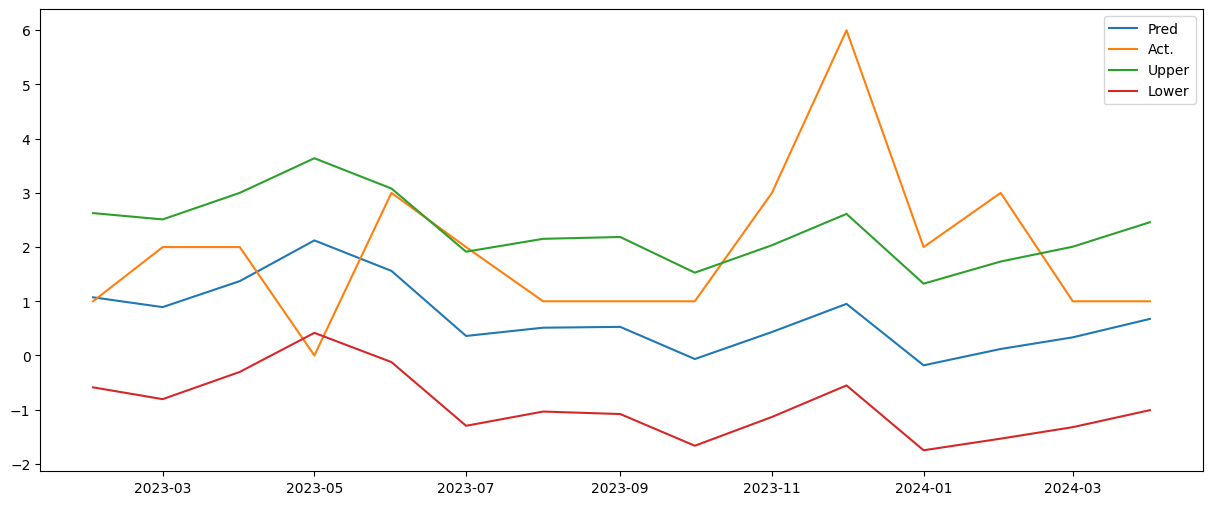

In [232]:
mean_absolute_error(forecast[["yhat"]],t_y)
plt.figure(figsize=(15,6))
plt.plot(forecast.ds,forecast.yhat,label = "Pred")
plt.plot(forecast.ds,t_y,label = "Act.")
plt.plot(forecast.ds,forecast.yhat_upper,label = "Upper")
plt.plot(forecast.ds,forecast.yhat_lower,label = "Lower")
plt.legend()
plt.show()

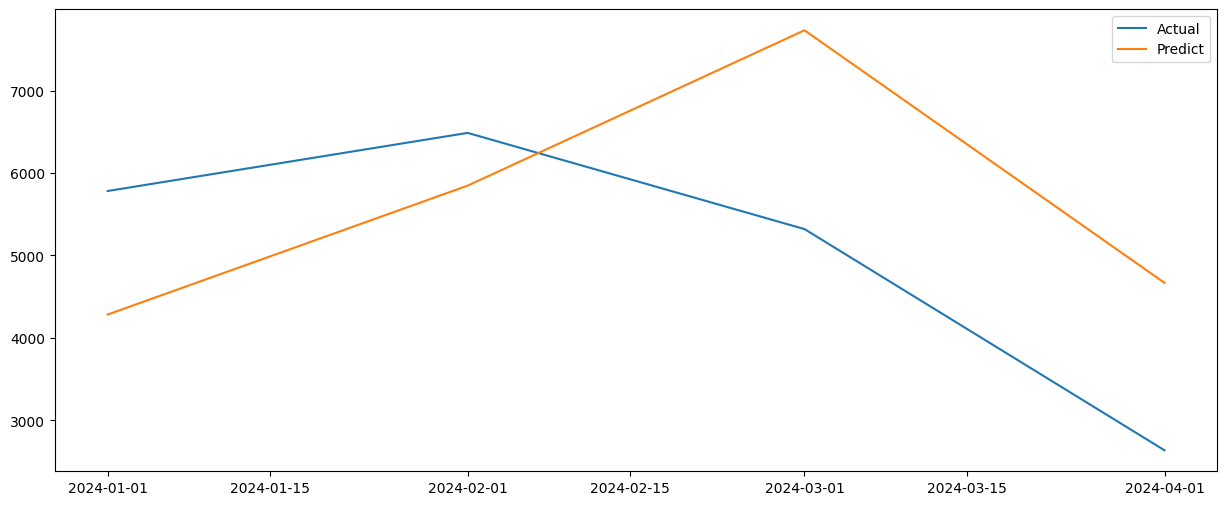

In [97]:
d = results[results.Brand == "TOYOTA"]
plt.figure(figsize=(15,6))
plt.plot(d.Date,d.actual,label = "Actual")
plt.plot(d.Date,d.predict,label = "Predict")
plt.legend()
plt.show()